https://stackoverflow.com/questions/63528705/how-to-modify-edge-labels-in-digraph-of-networkx

In [1]:
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
from matplotlib import pyplot as plt

In [2]:
edges = {'0in1out': ['0in', '1out', -3.6377842209674958],
'1mid0mid': ['1mid', '0mid', 0.6165115214405615],
'1in1mid': ['1in', '1mid', 3.6368075690523423],
'0in1mid': ['0in', '1mid', -2.76795360903403],
'0mid0out': ['0mid', '0out', -0.7665496719059972],
'0mid1out': ['0mid', '1out', 2.0047001373416755],
'0mid1mid': ['0mid', '1mid', -1.34533801312376],
'1in0mid': ['1in', '0mid', 2.136059819929803],
'0mid0mid': ['0mid', '0mid', -1.8265832443155807],
'1mid0out': ['1mid', '0out', 2.9330077826949488],
'0in0out': ['0in', '0out', 2.913596825881276],
'1in2out': ['1in', '2out', 3.5933465588280176]}

In [3]:
# edges = {'0in1out': ['0in', '1out', -3.6377842209674958],
# '1mid0mid': ['1mid', '0mid', 0.6165115214405615],
# '1in1mid': ['1in', '1mid', 3.6368075690523423],
# '0in1mid': ['0in', '1mid', -2.76795360903403],
# '0mid0out': ['0mid', '0out', -0.7665496719059972],
# '0mid1out': ['0mid', '1out', 2.0047001373416755],
# '0mid1mid': ['0mid', '1mid', -1.34533801312376],
# '1in0mid': ['1in', '0mid', 2.136059819929803],
# '0mid0mid': ['0mid', '0mid', -1.8265832443155807],
# '1mid0out': ['1mid', '0out', 2.9330077826949488],
# '0in0out': ['0in', '0out', 2.913596825881276],
# '1in2out': ['1in', '2out', 3.5933465588280176],   
# '3mid0mid': ['3mid', '0mid', 3.5933465588280176],
# '2in3mid': ['2in', '3mid', 3.5933465588280176],
# '3mid1mid': ['3mid', '1mid', 3.5933465588280176]}

In [4]:
edges_list = [tuple(edges[pair]) for pair in edges]

In [5]:
edges_list

[('0in', '1out', -3.6377842209674958),
 ('1mid', '0mid', 0.6165115214405615),
 ('1in', '1mid', 3.6368075690523423),
 ('0in', '1mid', -2.76795360903403),
 ('0mid', '0out', -0.7665496719059972),
 ('0mid', '1out', 2.0047001373416755),
 ('0mid', '1mid', -1.34533801312376),
 ('1in', '0mid', 2.136059819929803),
 ('0mid', '0mid', -1.8265832443155807),
 ('1mid', '0out', 2.9330077826949488),
 ('0in', '0out', 2.913596825881276),
 ('1in', '2out', 3.5933465588280176)]

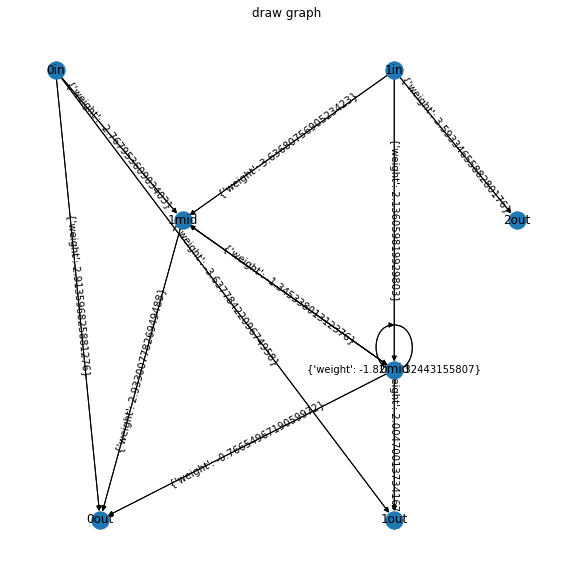

<Figure size 432x288 with 0 Axes>

In [6]:
my_graph = nx.MultiDiGraph()
my_graph.add_weighted_edges_from(edges_list)


write_dot(my_graph, "graph.dot")
plt.figure(figsize=[10,10])
plt.title("draw graph")
pos = graphviz_layout(my_graph, prog='dot')
labels = nx.get_edge_attributes(my_graph, 'w')


# nx.draw_networkx_edge_labels(my_graph, pos, labels=labels)
nx.draw_networkx_edge_labels(my_graph, pos)

nx.draw(my_graph, pos, with_labels=True, arrows=True)

nx.draw_networkx_edges(my_graph, pos)
# nx.draw_networkx_edge_labels(my_graph, pos, edge_labels = nx.get_edge_attributes(my_graph,'weight'))

plt.show()
plt.clf()

In [7]:
for i in my_graph.adj:
    if my_graph.adj[i]:
        print(i, my_graph.adj[i])
        print()

0in {'1out': {0: {'weight': -3.6377842209674958}}, '1mid': {0: {'weight': -2.76795360903403}}, '0out': {0: {'weight': 2.913596825881276}}}

1mid {'0mid': {0: {'weight': 0.6165115214405615}}, '0out': {0: {'weight': 2.9330077826949488}}}

0mid {'0out': {0: {'weight': -0.7665496719059972}}, '1out': {0: {'weight': 2.0047001373416755}}, '1mid': {0: {'weight': -1.34533801312376}}, '0mid': {0: {'weight': -1.8265832443155807}}}

1in {'1mid': {0: {'weight': 3.6368075690523423}}, '0mid': {0: {'weight': 2.136059819929803}}, '2out': {0: {'weight': 3.5933465588280176}}}



In [10]:
A = nx.adjacency_matrix(my_graph)
print(A.todense())

[[ 0.         -3.63778422 -2.76795361  0.          0.          2.91359683
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.61651152  0.          2.93300778
   0.        ]
 [ 0.          2.00470014 -1.34533801 -1.82658324  0.         -0.76654967
   0.        ]
 [ 0.          0.          3.63680757  2.13605982  0.          0.
   3.59334656]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]]


In [11]:
A.setdiag(A.diagonal() * 2)
print(A.todense())

[[ 0.         -3.63778422 -2.76795361  0.          0.          2.91359683
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.61651152  0.          2.93300778
   0.        ]
 [ 0.          2.00470014 -1.34533801 -3.65316649  0.         -0.76654967
   0.        ]
 [ 0.          0.          3.63680757  2.13605982  0.          0.
   3.59334656]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]]


C:\Users\a831062\Anaconda3\lib\site-packages\scipy\sparse\_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [9]:
G = nx.Graph([(1, 1)])
A = nx.adjacency_matrix(G)
print(A.todense())

A.setdiag(A.diagonal() * 2)
print(A.todense())

[[1]]
[[2]]
